In [1]:
conda install pytorch::pytorch torchvision torchaudio -c pytorch

Retrieving notices: ...working... done
Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
cd yolov5

/Users/stevenmac/Desktop/Pytorch/yolov5


In [4]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip uninstall -y torch torchvision
!pip install torch torchvision torchaudio

Found existing installation: torch 2.3.1
Uninstalling torch-2.3.1:
  Successfully uninstalled torch-2.3.1
Found existing installation: torchvision 0.18.1
Uninstalling torchvision-0.18.1:
  Successfully uninstalled torchvision-0.18.1
  Using cached torch-2.3.1-cp39-none-macosx_11_0_arm64.whl.metadata (26 kB)
  Using cached torchvision-0.18.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.6 kB)
Using cached torch-2.3.1-cp39-none-macosx_11_0_arm64.whl (61.0 MB)
Using cached torchvision-0.18.1-cp39-cp39-macosx_11_0_arm64.whl (1.6 MB)


In [6]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [7]:
print(torch.backends.mps.is_available())
mps_device = torch.device("mps")

True


In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/stevenmac/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-1 Python-3.9.18 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
img='https://blog-images-1.pharmeasy.in/blog/production/wp-content/uploads/2022/05/03114105/7-5.jpg'

In [11]:
results = model(img)
results.print()
labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()

image 1/1: 452x760 12 apples
Speed: 893.7ms pre-process, 76.5ms inference, 1.2ms NMS per image at shape (1, 3, 384, 640)


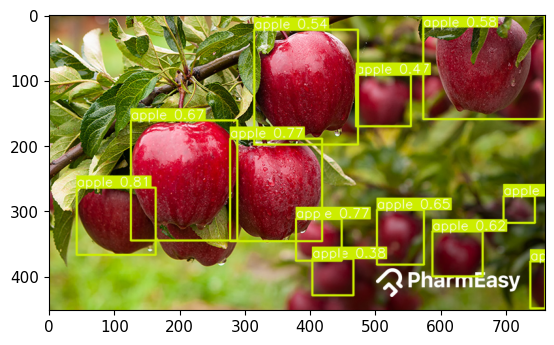

[         47          47          47          47          47          47          47          47          47          47          47          47]
[[   0.055713     0.58489     0.21468     0.81416     0.81193]
 [     0.3655     0.41848     0.55065     0.76597     0.76994]
 [    0.49818     0.69147     0.59019     0.83232     0.76961]
 [    0.16475     0.35796     0.37971     0.76542     0.67243]
 [    0.66099     0.66019     0.75579     0.84604     0.65381]
 [    0.77347     0.73404     0.87457     0.88707     0.62108]
 [    0.75411           0     0.99939     0.35349     0.58465]
 [    0.41323     0.04883      0.6234      0.4383     0.53985]
 [    0.96982     0.83443           1     0.99553     0.52653]
 [    0.61958     0.20198     0.72918     0.37688      0.4736]
 [    0.53102     0.82566     0.61351     0.94991      0.3774]
 [    0.91672     0.61386     0.97967     0.70564     0.31935]]


In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
print(labels)
print(cord_thres)

In [13]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['mango']
number_imgs = 20

In [ ]:
import cv2
frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(0)
while True:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Make detections 
        results = model(frame)
        
        cv2.imshow('YOLO', np.squeeze(results.render()))
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [15]:
!git clone https://github.com/HumanSignal/labelImg.git

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [16]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [21]:
cd

/Users/stevenmac


In [15]:
cd Desktop

/Users/stevenmac/Desktop


In [22]:
cd yolov5

/Users/stevenmac/yolov5


In [18]:
cd Pytorch

[Errno 2] No such file or directory: 'Pytorch'
/Users/stevenmac


In [23]:
!python train.py --img 320 --batch 16 --epochs 100  --data dataset.yml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: ⚠️ YOLOv5 is out of date by 8 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-326-gec331cbd Python-3.9.18 torch-2.3.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box

In [43]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/stevenmac/yolov5/runs/train/exp26/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/stevenmac/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-7-1 Python-3.9.18 torch-2.3.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [47]:
img ="https://www.stylecraze.com/wp-content/uploads/2014/12/10-Amazing-Benefits-And-Uses-Of-Mango-Leaves-Aam-Ke-Patte_180370772.jpg"
results = model(img)
results.print()
labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()

image 1/1: 810x720 5 mangos
Speed: 449.4ms pre-process, 134.9ms inference, 6.5ms NMS per image at shape (1, 3, 640, 576)


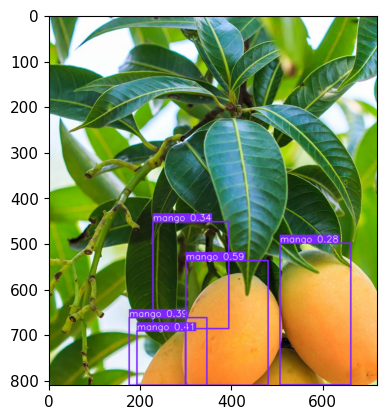

[         15          15          15          15          15]
[[    0.41661     0.66384     0.66529           1      0.5913]
 [    0.26729       0.854      0.4149           1     0.41009]
 [    0.24424     0.81792     0.48003           1     0.39178]
 [    0.31541     0.55901      0.5462     0.84777     0.33534]
 [    0.70152     0.61649     0.91804     0.99944     0.28087]]


In [48]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
print(labels)
print(cord_thres)

In [22]:
import cv2
frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(0)
while True:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Make detections 
        results = model(frame)
        
        cv2.imshow('YOLO', np.squeeze(results.render()))
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 